# Analyse the results from `a0_invert_vkdv.py`

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import h5py
from glob import glob


In [4]:
%matplotlib notebook

In [8]:
h5path = r'C:\Users\mrayson\cloudstor\Data\KdV\vkdv_optimization\*.h5'
h5files = sorted(glob(h5path))
nsteps = len(h5files)
nsteps

325

In [30]:
# Read in one file to get the array sizes
with h5py.File(h5files[0], "r") as f:
    frq = f['frq'][:] 
    density_params = f['density_params'][:] 
    time_obs = f['time_obs'][:]
    basetime = f['basetime'].value


nfrq = frq.shape[0]
nrho = density_params.shape[0]
nt = time_obs.shape[0]
nfrq, nrho, nt

(3, 7, 1441)

In [54]:
a0_init = np.zeros((2*nfrq, nsteps))
a0_opt = np.zeros((2*nfrq, nsteps))

A_obs =  np.zeros((nt, nsteps))
A_mod =  np.zeros((nt, nsteps))
time_obs =  np.zeros((nt, nsteps))

density_params = np.zeros((nrho, nsteps))

t0 = np.zeros((nsteps,))
twave = np.zeros((nsteps,))
ampfac = np.zeros((nsteps,))

t1=[]
t2=[]

for ii in range(nsteps):
    with h5py.File(h5files[ii], "r") as f:
        a0_init[:,ii] = f['a0_init'][:]
        a0_opt[:,ii] = f['a0_opt'][:]
        A_obs[:,ii] = f['A_obs'][:] 
        A_mod[:,ii] = f['A_mod'][:] 
        density_params[:,ii] = f['density_params'][:] 
        time_obs[:,ii] = f['time_obs'][:]
        t0[ii] = f['t0'].value
        t1.append(f['t1'].value)
        t2.append(f['t2'].value)
        twave[ii] = f['twave'].value
        ampfac[ii] = f['ampfac'].value

# Convert the time variables
time_obs = time_obs.astype('<M8[ns]')
t1 = np.array([np.datetime64(datetime.strptime(tt, '%Y-%m-%d %H:%M:%S')) for tt in t1])
t2 = np.array([np.datetime64(datetime.strptime(tt, '%Y-%m-%d %H:%M:%S')) for tt in t2])

# Time for the boundary condition
time_amp = np.array([-np.timedelta64(int(tt),'s')+ tt1 for tt,tt1 in zip(twave,t1)])

c:\users\mrayson\miniconda3\envs\soda\lib\site-packages\ipykernel_launcher.py:25: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
c:\users\mrayson\miniconda3\envs\soda\lib\site-packages\ipykernel_launcher.py:26: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
c:\users\mrayson\miniconda3\envs\soda\lib\site-packages\ipykernel_launcher.py:27: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
c:\users\mrayson\miniconda3\envs\soda\lib\site-packages\ipykernel_launcher.py:28: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
c:\users\mrayson\miniconda3\envs\soda\lib\site-packages\ipykernel_launcher.py:29: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


In [56]:
time_amp[0], t1[0]

(numpy.datetime64('2016-04-30T06:04:47.000000'),
 numpy.datetime64('2016-05-01T00:00:00.000000'))

<IPython.core.display.Javascript object>


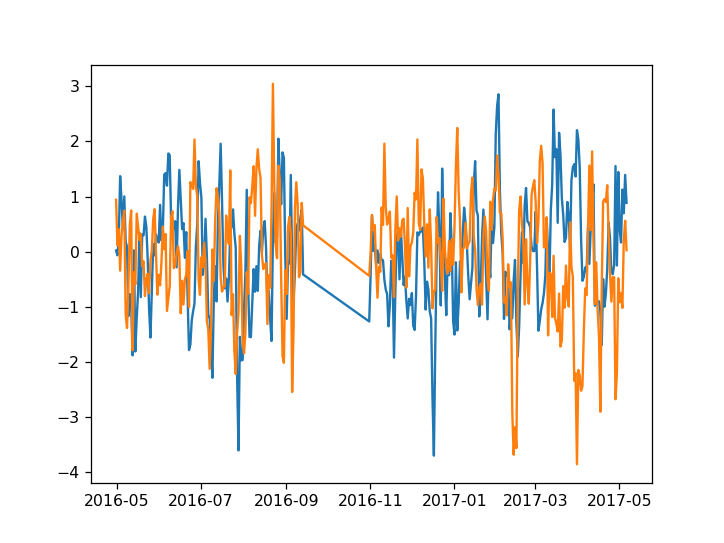

In [63]:
frq = 2
plt.figure()
plt.plot(time_amp, a0_init[frq,:],'-')
plt.plot(time_amp, a0_init[frq+nfrq,:],'-')